In [3]:
import pandas as pd
import numpy  as np

dados = '/content/drive/MyDrive/Colab Notebooks/Dados/classificacao_falha_maquinas.csv'

df_original = pd.read_csv(dados)
df_original

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df_original['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [5]:
df_original['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df_tratado = df_original.drop(columns='Product ID')
df_tratado['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Supondo que o nome do DataFrame seja df
colunas_categoricas = ['Type']

# Criar um DataFrame temporário para aplicar o one-hot encoding
df_temp = pd.DataFrame(df_tratado[colunas_categoricas])

encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df_temp).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

# Concatenar os DataFrames
df_final = pd.concat([df_tratado.drop(columns=colunas_categoricas), df_encoded], axis=1)
df_final

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,No Failure,0.0,0.0,1.0
1,2,298.2,308.7,1408,46.3,3,0,No Failure,0.0,1.0,0.0
2,3,298.1,308.5,1498,49.4,5,0,No Failure,0.0,1.0,0.0
3,4,298.2,308.6,1433,39.5,7,0,No Failure,0.0,1.0,0.0
4,5,298.2,308.7,1408,40.0,9,0,No Failure,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,No Failure,0.0,0.0,1.0
9996,9997,298.9,308.4,1632,31.8,17,0,No Failure,1.0,0.0,0.0
9997,9998,299.0,308.6,1645,33.4,22,0,No Failure,0.0,0.0,1.0
9998,9999,299.0,308.7,1408,48.5,25,0,No Failure,1.0,0.0,0.0


In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
 8   Type_H                   10000 non-null  float64
 9   Type_L                   10000 non-null  float64
 10  Type_M                   10000 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 859.5+ KB


In [21]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns='Failure Type')
y = df_final['Failure Type']

X, X_teste, y, y_teste = train_test_split(X,y, random_state=42, stratify=y, test_size=0.20)
X_treino, X_val, y_treino, y_val = train_test_split(X,y, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(max_depth=10, random_state=42)
modelo.fit(X_treino,y_treino)
y_pred = modelo.predict(X_val)

print(f'Acurácia de Treino: {modelo.score(X_treino, y_treino) * 100}')
print(f'Acurácia de Validação: {modelo.score(X_val, y_val) * 100}')

Acurácia de Treino: 99.85000000000001
Acurácia de Validação: 99.6


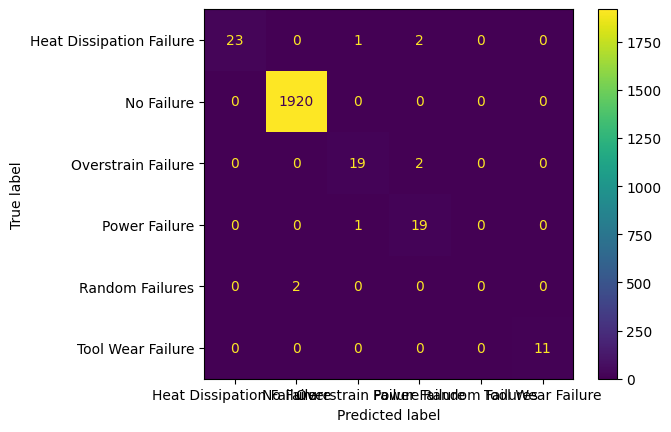

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_val, y_pred)

visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=modelo.classes_)
visualizacao.plot();

In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print('Relátorio de Classificação:\n', report)

Relátorio de Classificação:
                           precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.88      0.94        26
              No Failure       1.00      1.00      1.00      1920
      Overstrain Failure       0.90      0.90      0.90        21
           Power Failure       0.83      0.95      0.88        20
         Random Failures       0.00      0.00      0.00         2
       Tool Wear Failure       1.00      1.00      1.00        11

                accuracy                           1.00      2000
               macro avg       0.79      0.79      0.79      2000
            weighted avg       1.00      1.00      1.00      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


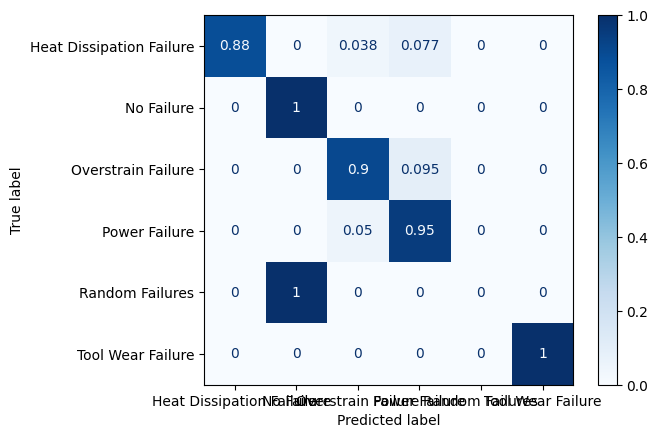

In [28]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues')